## 1. Load and Preprocess the MNIST Dataset
Imports libraries, loads the MNIST dataset, and preprocesses the data by normalizing and reshaping it. It concludes by visualizing sample digits to confirm the data is loaded correctly.

(60000, 28, 28)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


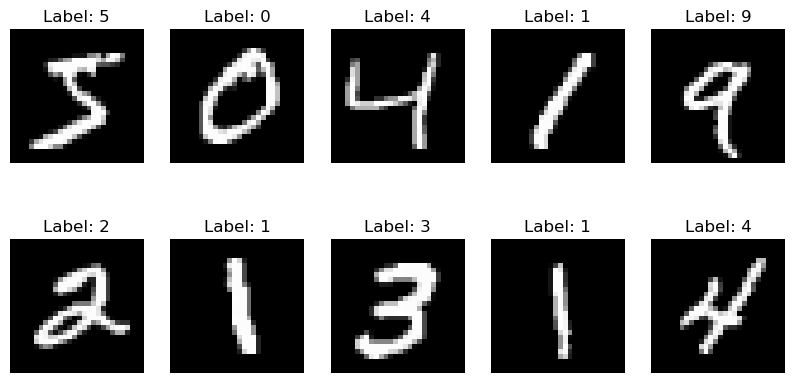

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Dropout

# Load the dataset and split, training and test 
# Each image is a 28x28 pixel grayscale image
# This is a common experisize for ML
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

# Normalize pixel values for the input layer
# Best for training, helps neural networks converge faster
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Changes to 1d array of 784 pixels, matching input
# Allows use with fully connected dense layers
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)


print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Visualize 10 samples from that data to understand data better
# Helps verify data quality before training
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')


plt.show()


## Build the Neural Network Model
Defines a sequential neural network with three hidden layers using relu activation, and an output layer using softmax.

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns




# Build Neural
model = Sequential([
    # Input layer
    Input(shape=(784,)),  # 28x28

    # Drop to prevent overfitting
    
    # 640 neurons
    Dense(640, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    # 512 neurons
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    # 384 neurons
    Dense(384, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    
    # 10 neurons 
    Dense(10, activation='softmax')
])

# Summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 640)               502400    
                                                                 
 batch_normalization (BatchN  (None, 640)              2560      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 640)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               328192    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

## Train the Neural Network
Compiles the model with the Adam optimizer and trains it on the data. A ModelCheckpoint saves the best-performing version of the model, and the training/validation learning curves are plotted.

Epoch 1/30


2025-08-26 16:32:39.119606: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


235/235 [==============================] - 2s 8ms/step - loss: 0.3306 - accuracy: 0.9001 - val_loss: 0.2023 - val_accuracy: 0.9366
Epoch 2/30
235/235 [==============================] - 2s 8ms/step - loss: 0.1495 - accuracy: 0.9541 - val_loss: 0.0903 - val_accuracy: 0.9708
Epoch 3/30
235/235 [==============================] - 2s 9ms/step - loss: 0.1132 - accuracy: 0.9645 - val_loss: 0.0774 - val_accuracy: 0.9760
Epoch 4/30
235/235 [==============================] - 2s 10ms/step - loss: 0.0914 - accuracy: 0.9713 - val_loss: 0.0767 - val_accuracy: 0.9757
Epoch 5/30
235/235 [==============================] - 2s 9ms/step - loss: 0.0822 - accuracy: 0.9738 - val_loss: 0.0680 - val_accuracy: 0.9798
Epoch 6/30
235/235 [==============================] - 2s 8ms/step - loss: 0.0707 - accuracy: 0.9768 - val_loss: 0.0647 - val_accuracy: 0.9786
Epoch 7/30
235/235 [==============================] - 2s 9ms/step - loss: 0.0642 - accuracy: 0.9793 - val_loss: 0.0648 - val_accuracy: 0.9800
Epoch 8/30
235/2

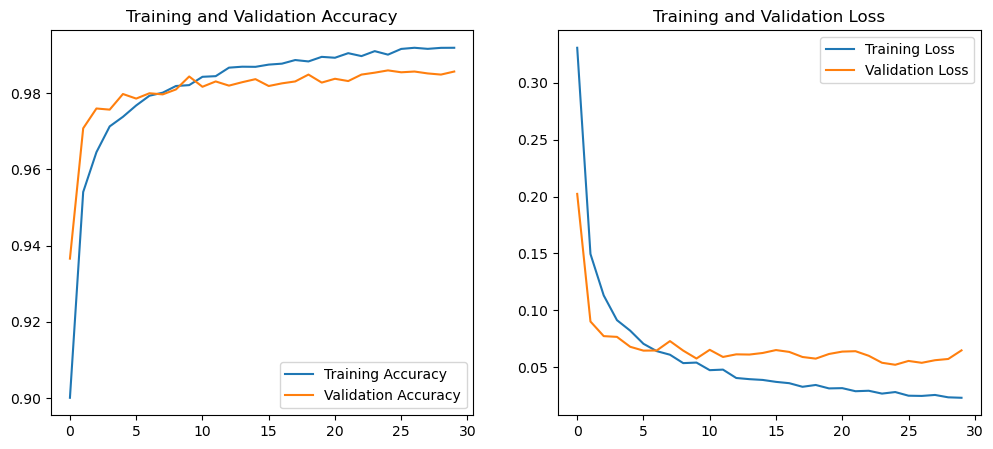

In [3]:
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Set metrics so model knows how to improve
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Saves model for opitmized specified metrics
# Prevents overfitting
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

# Fit the model and validate on test
# Checkpoint ensures best model kept
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=256, callbacks=[checkpoint])

# Show training for each epoch to see loss, val_accuracy and val_loss
# Accuracy visualization and performance tracking
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot the training and validation loss for epochs. This shows how well ur model is training.
# Tracks how model's prediction error changes during training
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Evaluate the Model
Loads the best-saved model and evaluates its final performance on the unseen test set. It then generates a detailed classification report and a visual confusion matrix.

313/313 [==============================] - 0s 734us/step - loss: 0.0523 - accuracy: 0.9860
Test Accuracy: 0.9860
313/313 [==============================] - 0s 966us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



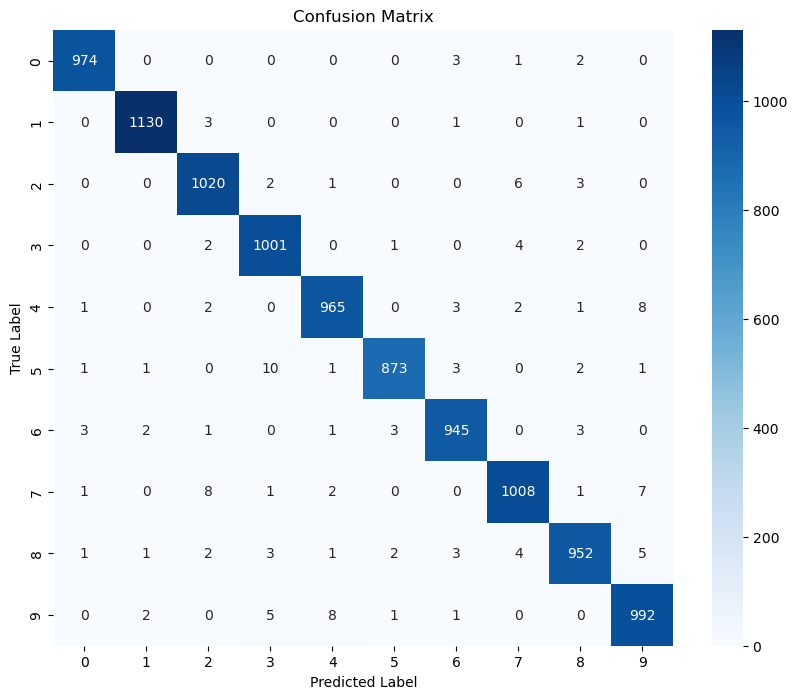

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


best_model = tf.keras.models.load_model('best_model.keras')

# Loads the best performing model saved during training to evaluate
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions shows quality of best model
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# Compute the confusion matrix to analyze performance
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix via heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Visualize Predictions
Visualizes the model's predictions on a random sample of test images, followed by a visualization of its first 10 misclassified images.

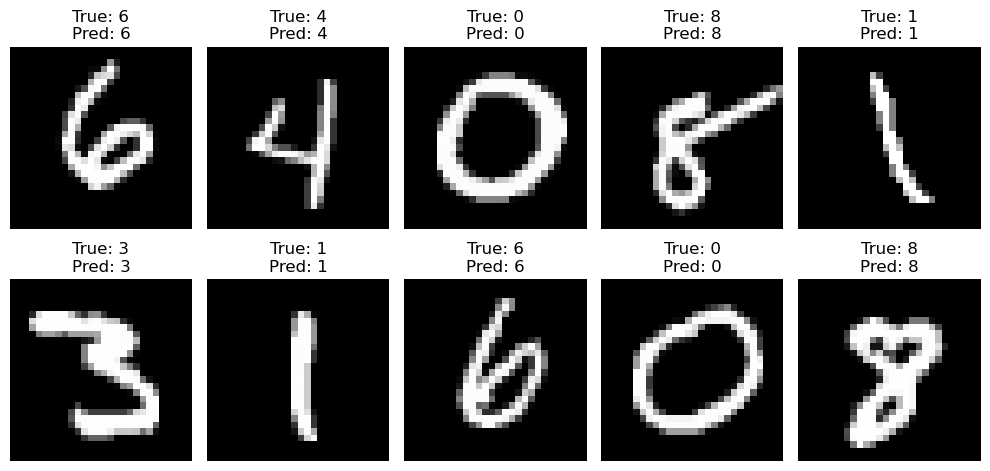

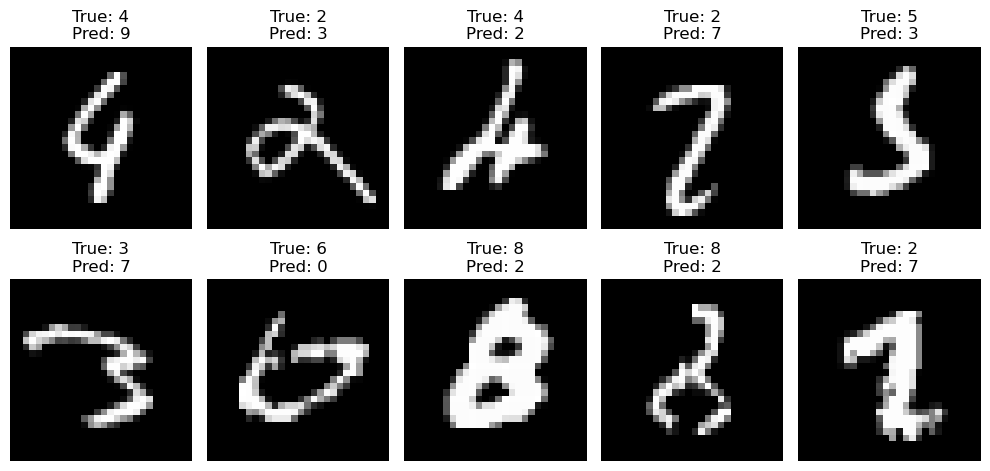

In [5]:
# Randomly select 10 indices from test
indices = np.random.choice(len(X_test), 10, replace=False)

# Visualize 10 random samples 
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Identify indices of incorrect predictions
incorrect_indices = np.where(y_test != y_pred_classes)[0]

# Visualize the first 10 misclassified samples from the test dataset to see where it is failing
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Conclusion
This project successfully builds a neural network that identifies handwritten digits with an impressive 98.6% accuracy on the test data.

This high performance was achieved by carefully preparing the image data and using smart training techniques to ensure the model learned general patterns instead of just memorizing the examples it saw. The process automatically saved the best-performing version of the model for evaluation.

Future steps to improve upon this strong result could include:

* Using a more advanced model type specialized for image recognition.

* Fine-tuning the model's settings to further boost performance.

* Showing the model more varied examples by slightly altering the training images.

Overall, this project is a strong, practical solution to a classic image recognition task.